#**Importación de librerias**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [75]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [76]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [77]:
#https://drive.google.com/file/d/1qTEgBUto-k1chkVKUnC4jTf78ubo2j0l/view?usp=drive_link

id='1qTEgBUto-k1chkVKUnC4jTf78ubo2j0l'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('listings.csv')

In [78]:
airbnbNY = pd.read_csv('listings.csv')

#**Analisis Exploratorio**

In [60]:
airbnbNY.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,year,month
0,1189243425411300671,The Grand III,61391963,Stay With Vibe,Manhattan,Murray Hill,40.750251,-73.977745,Entire home/apt,58,30,1,2024-08-02,0.86,130,357,1,NaN,2024,8
1,651593916026998398,Cheerful one bedroom townhouse with backyard,136812643,Marah,Brooklyn,Flatlands,40.624760,-73.935560,Private room,80,30,0,NaT,NaN,1,365,0,NaN,0,0
2,310325,Large Sunny Bedroom with Bay Window,745069,Kimberly,Manhattan,Harlem,40.823590,-73.946010,Private room,75,30,31,2019-09-28,0.21,2,335,0,NaN,2019,9
3,572612125615500056,Room by Sunny & Bay! Sunset Park & Bay Ridge,358089614,Joshua,Brooklyn,Sunset Park,40.639520,-74.014840,Private room,45,30,6,2024-07-30,0.21,2,336,1,NaN,2024,7
4,1020282701018874374,Trendy Private Bedroom,483056418,Kristina,Brooklyn,Bedford-Stuyvesant,40.678946,-73.943759,Private room,47,30,0,NaT,NaN,24,269,0,NaN,0,0


In [248]:
airbnbNY.shape

(37541, 18)

In [214]:
airbnbNY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37541 entries, 0 to 37540
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37541 non-null  int64  
 1   name                            37539 non-null  object 
 2   host_id                         37541 non-null  int64  
 3   host_name                       37536 non-null  object 
 4   neighbourhood_group             37541 non-null  object 
 5   neighbourhood                   37541 non-null  object 
 6   latitude                        37541 non-null  float64
 7   longitude                       37541 non-null  float64
 8   room_type                       37541 non-null  object 
 9   price                           22790 non-null  float64
 10  minimum_nights                  37541 non-null  int64  
 11  number_of_reviews               37541 non-null  int64  
 12  last_review                     

###**Eliminación de datos nulos**

In [79]:
# como el porcentaje de nulos de name y host_id es insignificante, lo descartaremos del dataframe
cantidad_nulos = airbnbNY.isnull().sum().reset_index().rename(columns = {0:'cantidad', 'index':'columnas'})
cantidad_nulos['porcentaje'] = (cantidad_nulos['cantidad'] / len(airbnbNY)) * 100
cantidad_nulos

,columnas,cantidad,porcentaje
0,id,0,0.000000
1,name,2,0.005328
2,host_id,0,0.000000
3,host_name,5,0.013319
4,neighbourhood_group,0,0.000000
5,neighbourhood,0,0.000000
6,latitude,0,0.000000
7,longitude,0,0.000000
8,room_type,0,0.000000
9,price,14751,39.293040


In [216]:
# eliminamos los name = null ya que la información
airbnbNY[airbnbNY['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
9449,21044649,NaN,151547086,Tanya,Bronx,Norwood,40.87553,-73.88601,Private room,NaN,30,23,2021-03-25,0.33,1,0,0,NaN
17661,10116081,NaN,51913270,Andrew,Manhattan,Midtown,40.75939,-73.96949,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0,NaN


In [217]:
airbnbNY[airbnbNY['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
6785,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.69977,-73.92912,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
19325,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67605,-73.95997,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
19628,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72119,-73.95279,Entire home/apt,NaN,30,1,2015-10-20,0.01,1,0,0,NaN
22232,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82992,-73.94033,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
27763,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71944,-73.95645,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0,NaN


In [80]:
#elimino esas 2 filas que tienen datos nulos, ya que no aporta al analisis sumado a que representa menos del 1% en referencia del resto de los datos y no hace la diferencia
airbnbNY = airbnbNY.drop([9449],axis=0)
airbnbNY = airbnbNY.drop([17661],axis=0)
airbnbNY = airbnbNY.drop([6785],axis=0)
airbnbNY = airbnbNY.drop([19325],axis=0)
airbnbNY = airbnbNY.drop([19628],axis=0)
airbnbNY = airbnbNY.drop([22232],axis=0)
airbnbNY = airbnbNY.drop([27763],axis=0)

In [81]:
airbnbNY.shape

(37534, 18)

###**Conversión de datos**

***Datos No Numericos***

In [82]:
airbnbNY['neighbourhood_group'] = airbnbNY['neighbourhood_group'].astype('category')
airbnbNY['room_type'] = airbnbNY['room_type'].astype('category')

In [83]:
airbnbNY['last_review'] = pd.to_datetime(airbnbNY['last_review'])
airbnbNY['year'] = airbnbNY['last_review'].dt.year
airbnbNY['month'] = airbnbNY['last_review'].dt.month

In [84]:
# Los NaN lo convertimos en 0
airbnbNY['year'] = airbnbNY['year'].fillna(0).astype(int)
airbnbNY['month'] = airbnbNY['month'].fillna(0).astype(int)

In [91]:
# FALTA LLEVARLO ABAJO
# total filas = 37541 = 100 %
#porcentaje_year = airbnbNY.year.value_counts(normalize=True)*100
#porcentaje_year = porcentaje_year.round(2).reset_index().rename(columns = {'proportion':'porcentaje'})
#porcentaje_year

***Datos numericos***

Verificamos si se puede realizar casteo y si existe outliers


In [120]:
airbnbNY.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year,month
count,3.753400e+04,3.753400e+04,37534.000000,37534.000000,22790.000000,37534.00000,37534.000000,25999,25999.000000,37534.000000,37534.000000,37534.000000,37534.000000,37534.000000
mean,3.783983e+17,1.683024e+08,40.728717,-73.946983,232.891795,28.98143,25.238557,2022-06-04 11:05:34.951344384,0.892512,56.180263,152.825092,3.565114,1400.513534,4.889487
min,2.595000e+03,1.678000e+03,40.500366,-74.251907,8.000000,1.00000,0.000000,2011-05-12 00:00:00,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.065109e+07,1.705558e+07,40.688490,-73.983108,85.000000,30.00000,0.000000,2020-03-16 00:00:00,0.090000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.867353e+07,8.427981e+07,40.726090,-73.954544,147.000000,30.00000,3.000000,2023-09-17 00:00:00,0.320000,2.000000,128.000000,0.000000,2021.000000,6.000000
75%,8.452118e+17,3.052402e+08,40.762380,-73.927793,250.000000,30.00000,21.000000,2024-07-02 12:00:00,1.070000,8.000000,294.000000,2.000000,2024.000000,8.000000
max,1.237702e+18,5.992925e+08,40.911390,-73.713650,100000.000000,1250.00000,1941.000000,2024-09-04 00:00:00,110.100000,876.000000,365.000000,1772.000000,2024.000000,12.000000
std,4.644047e+17,1.820666e+08,0.056337,0.054608,1019.738134,30.71204,60.176995,NaN,1.864794,170.613021,142.533254,16.979618,932.877949,4.095442


In [85]:
airbnbNY['price'] = airbnbNY['price'].fillna(0)

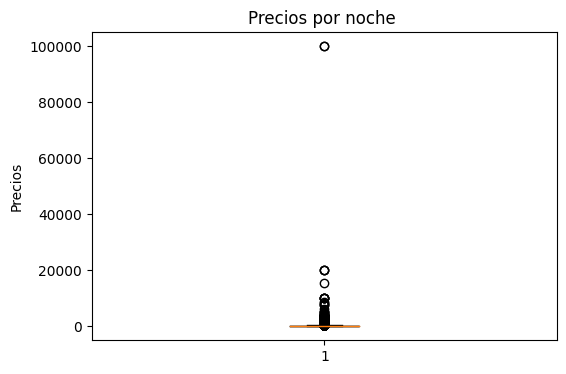

In [86]:
#Verificamos si existe outliers
plt.figure(figsize=(6,4))
plt.boxplot(airbnbNY['price'])
plt.title('Precios por noche ')
plt.ylabel('Precios')
plt.show()

In [87]:
# teoría de quadril https://www.atlassian.com/data/charts/box-plot-complete-guide#:~:text=What%20is%20a%20box%20plot,line%20marking%20the%20median%20value.
def obtenerLimitesDeBoxplot(columna):

    Q1 = np.percentile(columna, 25)
    Q3 = np.percentile(columna, 75)

    #rango intercuartil (RIC)
    IQR = Q3 - Q1

    #Limite los extremos del boxplot, osea limito los outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    return limite_inferior, limite_superior

In [88]:
# elimino los outliers
limite_inferior, limite_superior = obtenerLimitesDeBoxplot(airbnbNY['price'])

airbnbNY= airbnbNY.loc[(airbnbNY['price'] >= limite_inferior) & (airbnbNY['price'] <= limite_superior), :]

In [89]:
# los outliers de price representa 2356 datos y són 6.25% del total de los datos. Como es mínimo ese porcentaje, por tal motivo lo  descartaremos
airbnbNY.shape

(35171, 20)

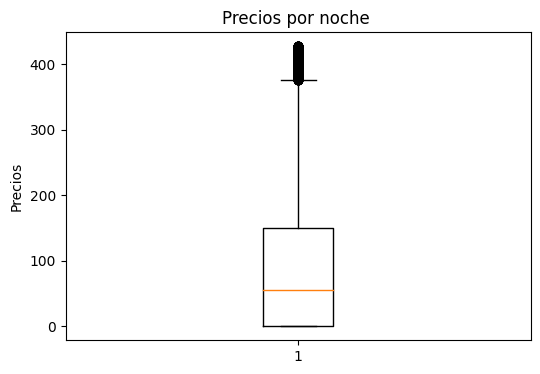

In [90]:
#Verificamos si existe outliers
plt.figure(figsize=(6,4))
plt.boxplot(airbnbNY['price'])
plt.title('Precios por noche ')
plt.ylabel('Precios')
plt.show()

In [91]:
# no eliminamos los price = 0 pq lo reemplazaremos por su valor promedio según zona y tipo de departamento
airbnbNY.price.value_counts().reset_index()

,price,count
0,0.0,14744
1,150.0,585
2,100.0,438
3,200.0,393
4,120.0,372
...,...,...
407,26.0,2
408,20.0,2
409,16.0,1
410,14.0,1


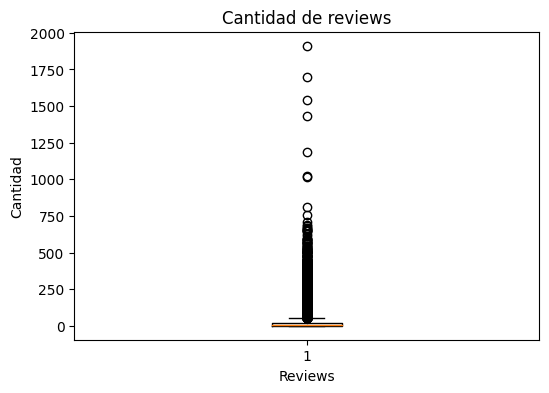

In [92]:
#Verificamos si existe outliers
plt.figure(figsize=(6,4))
plt.boxplot(airbnbNY['number_of_reviews'])
plt.title('Cantidad de reviews')
plt.ylabel('Cantidad')
plt.xlabel('Reviews')
plt.show()

In [93]:
# Descartamos los outliers de price
airbnbNY = airbnbNY.loc[airbnbNY['number_of_reviews']<1000, :]

In [22]:
airbnbNY.shape

(35164, 20)

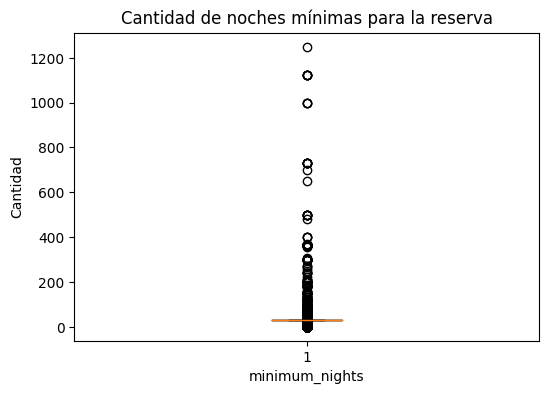

In [94]:
#Verificamos si existe outliers
plt.figure(figsize=(6,4))
plt.boxplot(airbnbNY['minimum_nights'])
plt.title('Cantidad de noches mínimas para la reserva')
plt.ylabel('Cantidad')
plt.xlabel('minimum_nights')
plt.show()

In [95]:
# Descartamos los outliers de price - consideramos un promedio de alquiler por 1 año
airbnbNY = airbnbNY.loc [airbnbNY['minimum_nights']<400, :]

In [96]:
airbnbNY.shape

(35137, 20)

# **Visualizaciones**

* **LinePlot**

**1- ¿Cómo evoluciono el precio en el transcurso de los años para las distintas viviendas?**

> Recordemos lo sgte, en USA la etapa de pandemia se considera de 01/2020 al 09/2022

> En la visualización podemos observar lo sgte:

 * 2019-12 al  2022-12 el precio de **Entire home** ha superado al precio de **hotel room**, era de esperarse ya que en la etapa de pandemia los hoteles tenian más restricciones que el **Entire home**

 * 2023-12 al 2024-09 el precio de **hotel room** ha superado al de **Entire home** etapa donde no hay más restricciones por el covid

* En términos gral se puede apreciar que el precio de **Entire** como **hotel** son más elevados que **private room** y **shared room**

* En el último año el promedio de alquiler de **Entire home** es de 185, seguido por **Hotel** con un precio de 179, en tercer lugar **Private room** con un promedio de 117 y por último **shared room** con un promedio de 71

In [97]:
# NO ELIMINAMOS PRECIO = O PQ VA SER REEMPLAZADO POR SU PROMEDIO SEGUN TIPO DE VIVIENDA Y ZONA
newDF1 = airbnbNY[airbnbNY['price'] > 0]
newDF1.shape

(20417, 20)

In [98]:
# Vemos que las reviews en el rango de 2011 - 2018 representa menos del 1%. Por lo que que no consideraremos el analisis de precio en ese rango de años
# Por otro lado hay que tener en cuenta que el año de pandemia en USA fue de 01/2020 al 09/2022. Por lo que veremos la evolución del precio entre 2 años antes y 2 años despues de pandemia

# FALTA ANALIZAR SI ESOS YEAR = O SE COMPLETA CON ALGUN AÑO O NO CONSIDERAMOS EN NUESTRA CUENTA, YA QUE REPRESENTA EL 2° VALOR MAS ALTO

tabla1 = newDF1.year.value_counts().reset_index().rename(columns = {'count':'cantidad'})
tabla1['porcentaje'] = (tabla1['cantidad'] / len(newDF1)) * 100
tabla1

,year,cantidad,porcentaje
0,2024,8495,41.607484
1,0,5572,27.290983
2,2023,4543,22.251065
3,2022,780,3.820346
4,2020,289,1.415487
5,2021,282,1.381202
6,2019,241,1.180389
7,2018,79,0.386932
8,2016,48,0.235098
9,2017,45,0.220405


In [99]:
# FALTA ANALIZAR SI YEAR = O SE COMPLETA CON ALGUN AÑO O NO CONSIDERAMOS EN NUESTRA CUENTA, YA QUE REPRESENTA EL 2° VALOR MAS ALTO - VER CRITERIO DESPUES DE LA VISUALIZACION
newDF2 = newDF1[newDF1['year'] > 2018]
#airbnbNY = airbnbNY[airbnbNY['year'] > 2018, :]
newDF2.shape

(14630, 20)

In [100]:
tabla2 = newDF2.groupby(['year', 'room_type']).agg({'price': ['mean','count','min','max']})
tabla2

price                    
                            mean count    min    max
year room_type                                      
2019 Entire home/apt  210.762376   101   65.0  425.0
     Hotel room       200.000000     2  200.0  200.0
     Private room      94.225564   133   34.0  400.0
     Shared room       91.400000     5   43.0  125.0
2020 Entire home/apt  198.992958   142   58.0  425.0
     Hotel room              NaN     0    NaN    NaN
     Private room      91.587413   143   24.0  357.0
     Shared room       99.750000     4   39.0  200.0
2021 Entire home/apt  202.775000   160   60.0  421.0
     Hotel room       160.000000     2  140.0  180.0
     Private room      86.974576   118   25.0  406.0
     Shared room       62.500000     2   50.0   75.0
2022 Entire home/apt  192.298329   419   58.0  427.0
     Hotel room       140.000000     1  140.0  140.0
     Private room      93.801136   352   21.0  425.0
     Shared room       60.250000     8   23.0  140.0
2023 Entire home/apt  192.075242  2379   21.0  427.0
     Hotel room       227.250000    12  135.0  345.0
     Private room     102.288031  2097   10.0  425.0
     Shared room       76.800000    55   14.0  255.0
2024 Entire home/apt  185.426363  4787   10.0  427.0
     Hotel room       179.976744    43   80.0  410.0
     Private room     117.908460  3605   20.0  426.0
     Shared room       71.733333    60   25.0  254.0

In [101]:
newDF2['trimestre'] = pd.PeriodIndex(newDF2['last_review'], freq='Q').strftime('%Y-%m')

In [102]:
newDF3 = newDF2.sort_values('trimestre')

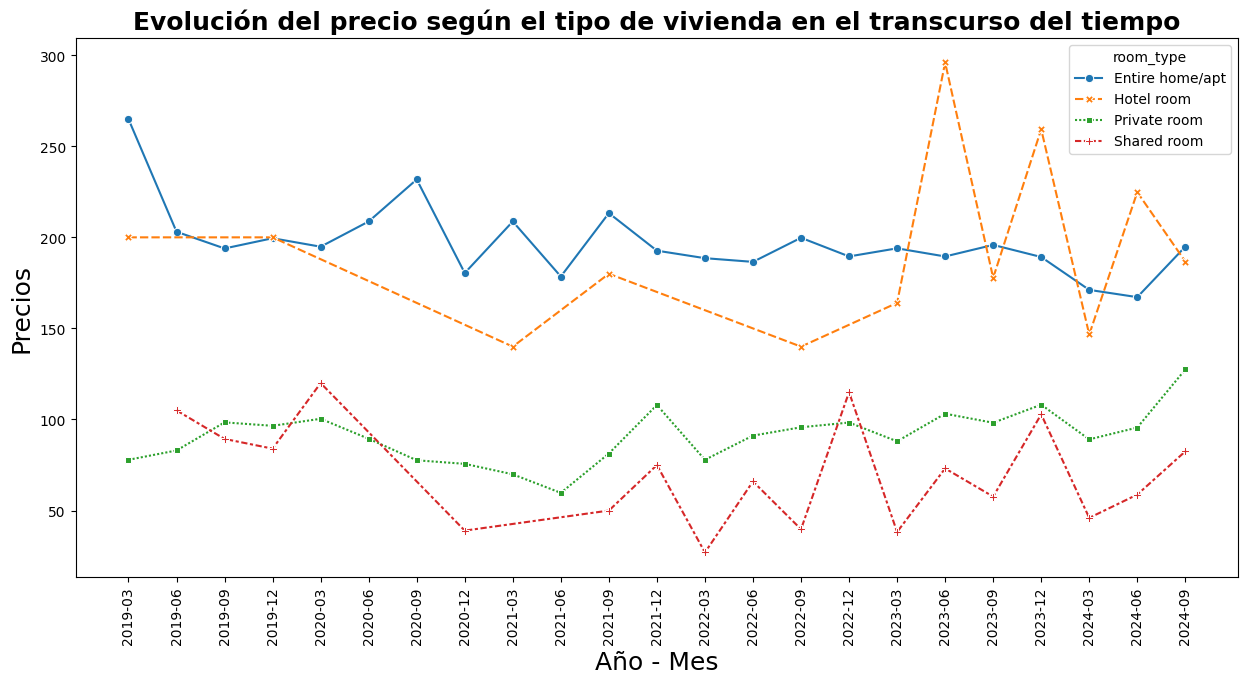

In [103]:
plt.figure(figsize=(15, 7))

visua1 = sns.lineplot(data=newDF3, x='trimestre', y='price', hue='room_type', errorbar=None, style = 'room_type', markers=True)

visua1.set_title('Evolución del precio según el tipo de vivienda en el transcurso del tiempo', fontsize=18, fontweight = 'heavy')
visua1.set_xlabel('Año - Mes', fontsize=18)
visua1.set_ylabel('Precios', fontsize=18)
visua1.set_xticklabels(visua1.get_xticklabels(), rotation=90)

plt.show()

*Analizamos un poco que hacemos con esos valores de Año = 0 que son los reemplazados por nulos*

In [104]:
aniocero = newDF1[newDF1['year'] == 0]

In [105]:
pd.crosstab(aniocero.room_type, aniocero.price, margins = True)

price,8.0,10.0,16.0,23.0,24.0,26.0,27.0,28.0,29.0,30.0,...,419.0,420.0,421.0,422.0,423.0,424.0,425.0,426.0,427.0,All
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,0,0,0,0,0,0,0,0,0,0,...,1,6,7,2,5,8,7,5,6,2581
Hotel room,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,129
Private room,0,0,1,1,0,1,6,1,2,2,...,0,1,1,0,0,0,0,0,0,2764
Shared room,0,0,0,0,1,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,98
All,1,5,1,1,1,2,6,1,3,4,...,1,7,8,2,5,8,7,5,6,5572


* **Barplot**

**2- ¿Qué tipo de viviendas són las más publicadas en cada zona?**

>Las viviendas más publicadas son del tipo **Entire home/apt** seguido por **Private room** y se registra a **Manhattan** y **Brooklyn** como los lugares con mayor oferta

In [27]:
room = airbnbNY.loc[:, ['room_type','neighbourhood_group']].groupby('room_type').value_counts().reset_index().rename(columns = {'count':'cantidad'})
room

<ipython-input-27-3b8a4b75e997>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  room = airbnbNY.loc[:, ['room_type','neighbourhood_group']].groupby('room_type').value_counts().reset_index().rename(columns = {'count':'cantidad'})


,room_type,neighbourhood_group,cantidad
0,Entire home/apt,Manhattan,9022
1,Entire home/apt,Brooklyn,6417
2,Entire home/apt,Queens,1980
3,Entire home/apt,Bronx,454
4,Entire home/apt,Staten Island,176
5,Hotel room,Manhattan,397
6,Hotel room,Brooklyn,9
7,Hotel room,Queens,7
8,Hotel room,Bronx,0
9,Hotel room,Staten Island,0


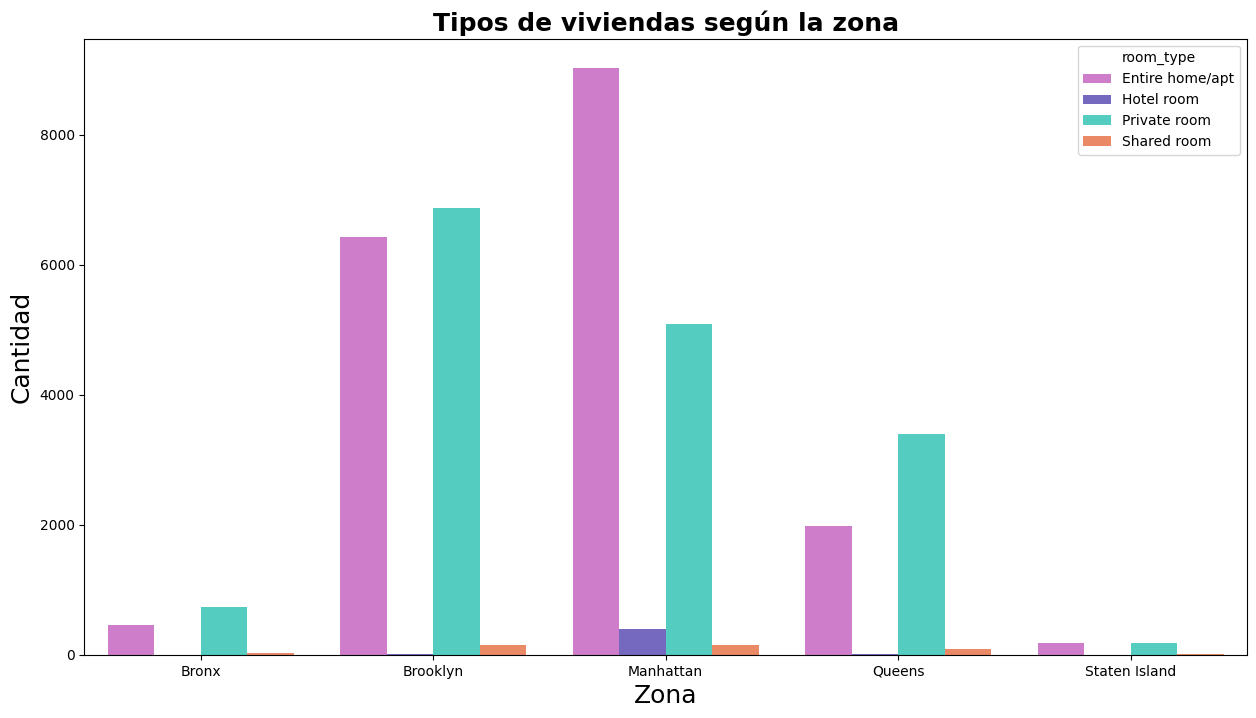

In [28]:
plt.figure(figsize=(15, 8))

ax= sns.barplot(x = 'neighbourhood_group', y = 'cantidad', data=room, hue='room_type', palette=['orchid','slateblue','turquoise','coral'])

plt.title('Tipos de viviendas según la zona',fontsize=18, fontweight = 'heavy')
plt.xlabel('Zona', fontsize=18)
plt.ylabel('Cantidad', fontsize=18)

plt.show()

**BoxPlot**

**3- ¿Cúal es el precio promedio del alquiler de viviendas en las distintas zonas?** (Obtenemos features de precio bajo,moderado y alto)

> La zona de **Manhattan** tiene un precio más elevado que el resto, con un promedio de 190 la noche, seguido por **Brooklyn** con un promedio de 138

In [322]:
newDF4 = airbnbNY[airbnbNY['price'] > 0]

In [323]:
precioPromedio = newDF4.groupby('neighbourhood_group').agg({'price': ['min','max','mean','count']}).stack()
precioPromedio

<ipython-input-323-911c24879990>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precioPromedio = newDF4.groupby('neighbourhood_group').agg({'price': ['min','max','mean','count']}).stack()
<ipython-input-323-911c24879990>:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  precioPromedio = newDF4.groupby('neighbourhood_group').agg({'price': ['min','max','mean','count']}).stack()


price
neighbourhood_group                   
Bronx               min      25.000000
                    max     405.000000
                    mean    113.004614
                    count   867.000000
Brooklyn            min      10.000000
                    max     426.000000
                    mean    137.729615
                    count  7567.000000
Manhattan           min       8.000000
                    max     427.000000
                    mean    190.473146
                    count  8118.000000
Queens              min      25.000000
                    max     425.000000
                    mean    119.030090
                    count  3556.000000
Staten Island       min      33.000000
                    max     370.000000
                    mean    112.669903
                    count   309.000000

<ipython-input-325-fc99815b653d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot1 = sns.boxplot(x='neighbourhood_group', y='price', data=newDF4, palette="hls")


Text(0, 0.5, 'Precios')

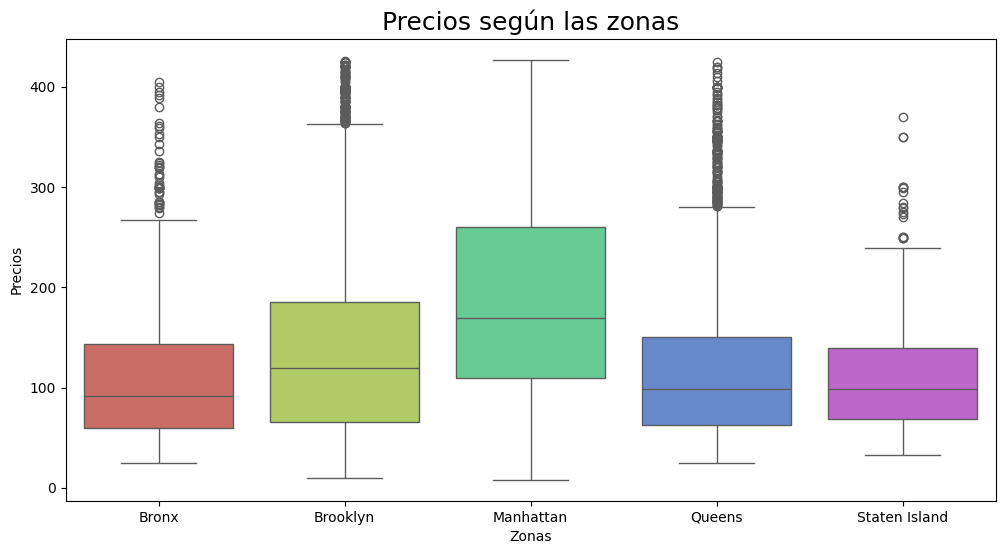

In [325]:
plt.figure(figsize=(12, 6))

boxplot1 = sns.boxplot(x='neighbourhood_group', y='price', data=newDF4, palette="hls")
boxplot1.set_title("Precios según las zonas", fontsize=18)
boxplot1.set_xlabel("Zonas")
boxplot1.set_ylabel("Precios")

* **Scatter o Dispersión**

**4- ¿Cúal es el promedio de precios de las viviendas según los barrios?**

>Las viviendas más publicadas son del tipo **Entire home/apt** seguido por **Private room** y se registra a **Manhattan** y **Brooklyn** como los lugares con mayor oferta

In [151]:
barrio_precio = airbnbNY[(airbnbNY['price'] > 0) & (airbnbNY['year'] > 2018)]
barrio_precio.shape

(14630, 20)

In [194]:
TopTenBarriosMasCaros = barrio_precio.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index().rename(columns={"price": "prom_price_neighbourhood"})
TopTenBarriosMasCaros.nlargest(11, 'prom_price_neighbourhood', keep='all')

,neighbourhood_group,neighbourhood,prom_price_neighbourhood
636,Manhattan,Tribeca,298.258065
478,Manhattan,Civic Center,296.000000
801,Queens,Neponsit,295.000000
515,Manhattan,Financial District,272.263636
517,Manhattan,Flatiron District,253.115385
996,Staten Island,Lighthouse Hill,250.000000
279,Brooklyn,Downtown Brooklyn,249.300000
275,Brooklyn,DUMBO,243.416667
264,Brooklyn,Cobble Hill,243.157895
617,Manhattan,SoHo,242.661017


In [157]:
barrio_precio['avg_price_neighbourhood'] = barrio_precio.groupby(['neighbourhood_group','neighbourhood'])['price'].transform(lambda x: x.mean())

<Figure size 1800x1600 with 0 Axes>

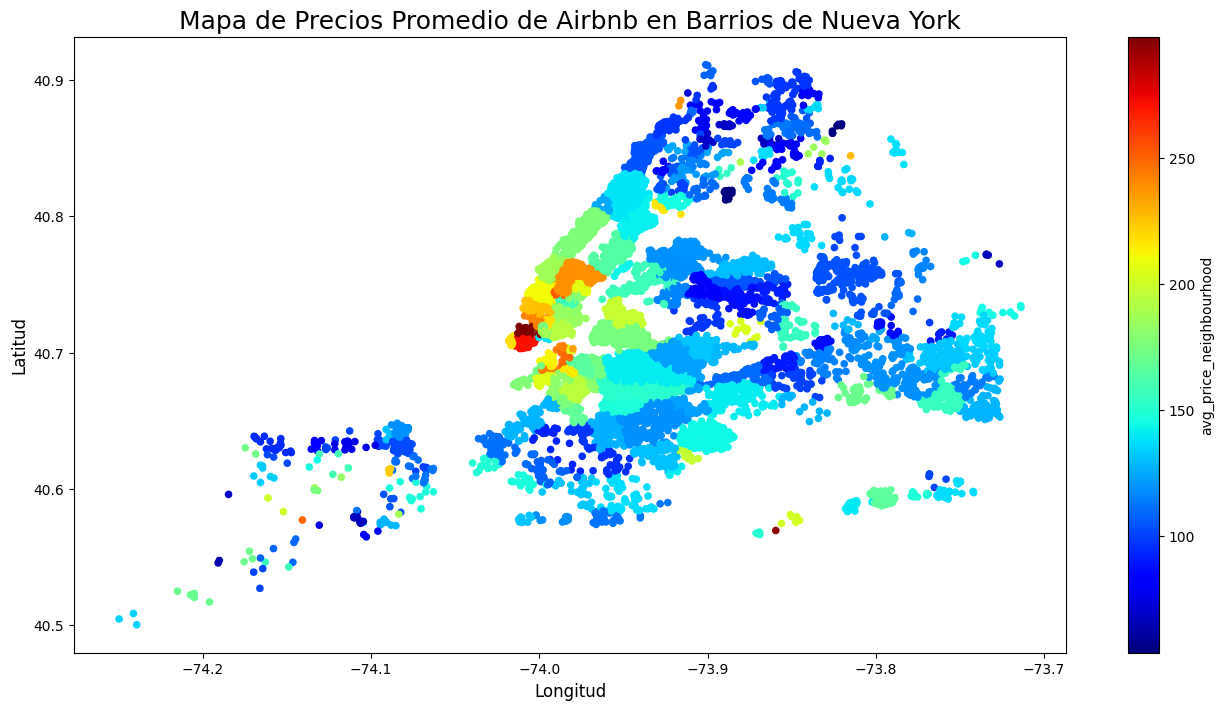

In [187]:
plt.figure(figsize=(18, 16))

barrio_precio.plot.scatter(x="longitude", y="latitude", c="avg_price_neighbourhood", figsize=(16, 8), cmap='jet')

plt.title('Mapa de Precios Promedio de Airbnb en Barrios de Nueva York', fontsize=18)
plt.xlabel('Longitud', fontsize = 12)
plt.ylabel('Latitud', fontsize = 12)

plt.show()

Text(0, 0.5, 'Latitud')

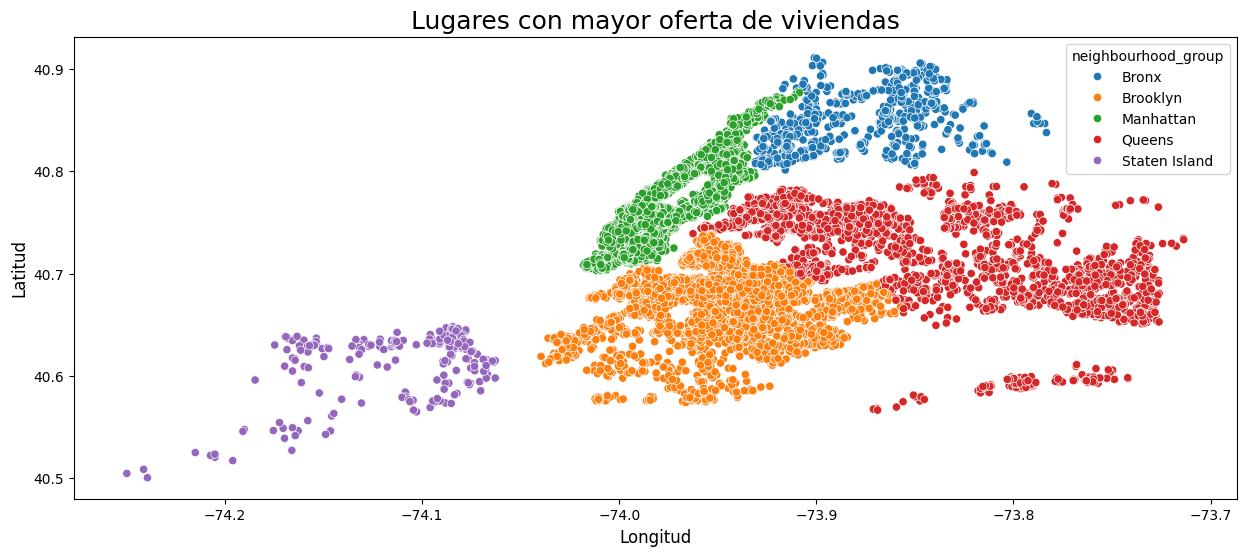

In [192]:
# Este gráfico sólo me sirve a modo informativo a que zona corresponde los barrios de la visualizacion anterior
plt.figure(figsize=(15, 6))

visua1 = sns.scatterplot(data=barrio_precio, x="longitude", y="latitude", hue="neighbourhood_group")
visua1.set_title("Lugares con mayor oferta de viviendas", fontsize=18)
visua1.set_xlabel("Longitud", fontsize = 12)
visua1.set_ylabel("Latitud", fontsize = 12)

* **Heatmap**

  **6- ¿Que variables numéricas del dataset tienen mejor relación?**

  > Se observa que las variables **Reviews_per_month** y **number_of_reviews_ltm** tienen una mayor relación con un puntaje de 0.79, seguido por **Reviews_per_month** y **number_of_reviews**.

  ¿Esto nos hace cuestionar si los usuarios se basa su búsqueda también en función de la cant de reviews que tenga una publicación?

  > Por otro lado, también notamos que  **price** tiene una mayor relación con **reviews_per_month** y **number_of_reviews_ltm**

In [189]:
newDF5 = airbnbNY[(airbnbNY['price'] > 0) & (airbnbNY['year'] > 2018)]

In [190]:
airbnbNY_numeric = newDF5[['host_id','latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm','year']]

Text(176.5815972222224, 0.5, 'Features')

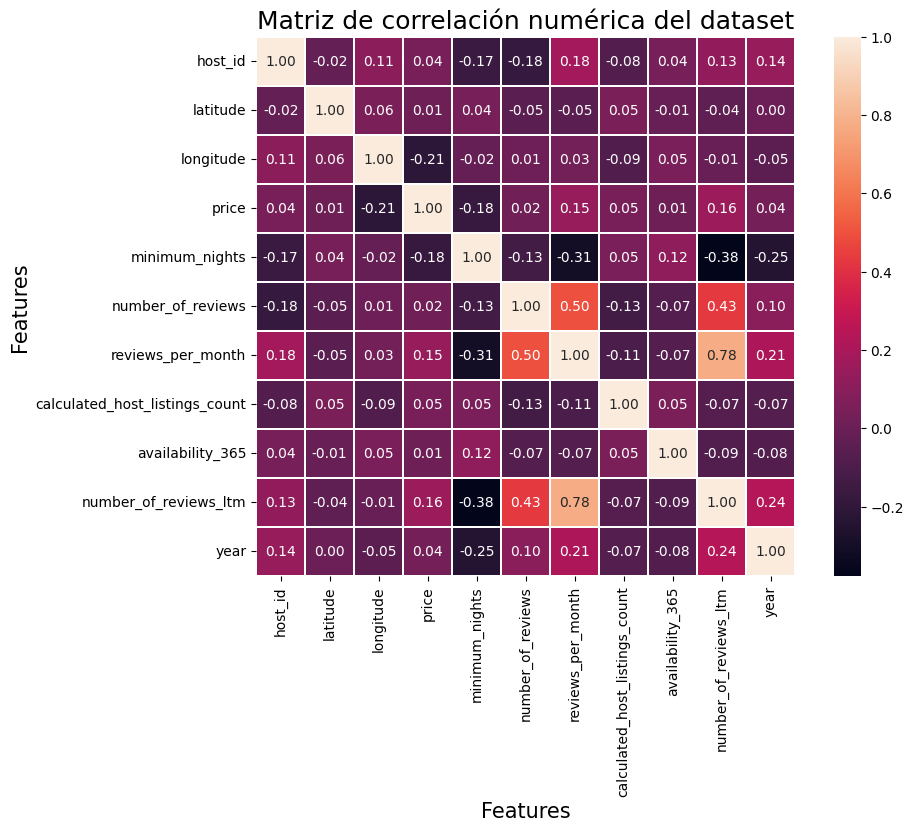

In [191]:
fig,axes=plt.subplots(figsize=(10,7))

visuaheatmap = sns.heatmap(airbnbNY_numeric.corr(),ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)

visuaheatmap.set_title('Matriz de correlación numérica del dataset', fontsize=18)
visuaheatmap.set_xlabel('Features', fontsize=15)
visuaheatmap.set_ylabel('Features', fontsize=15)

# **New features**

Rango de precios : Bajo, Moderado y Alto  ( uso col precio ) - visua 3

Visitas: Recomendado, no Recomendado (Reviews) - visua 4